# Análisis de Redes en *Python*
<br>
<img src="https://miro.medium.com/max/2978/1*rmq7bd3GFjcwfXtkrBQaPQ.png" alt="drawing" width="300"/>

## Software

NetworkX es un paquete Python para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas.

In [2]:
#Installation
#!conda install networkx

<img src="https://networkx.org/_static/networkx_logo.svg" alt="drawing" width="300"/>

In [3]:
import networkx as nx

NetworkX es un paquete muy completo que incluye entre otras cosas:

* Estructuras de datos para grafos, dígrafos y multigrafos
* Muchos algoritmos estándar
* Medidas de análisis
* Generadores de grafos clásicos, grafos aleatorios y redes sintéticas

NetworkX tiene distintas clases para distintos tipos
* Graph: No dirigido, simple
* DiGraph: Dirigido, simple
* MultiGraph: No dirigido, múltiples aristas paralelas
* MultiDiGraph: Dirigido, múltiples aristas

NetworkX es versátil por lo que: 

* Los nodos pueden ser "cualquier cosa" (por ejemplo, texto, imágenes, registros XML)
* Los aristas pueden contener datos arbitrarios (por ejemplo, pesos, series temporales)

## Primeros pasos

Existen varias maneras de representar y cargar en grafo a NetworkX, por el momento utilizaremos un grafo precargado en la librería.

In [4]:
karate = nx.karate_club_graph() #Cargar un grafo

*Zachary’s Karate Club* representa una red social de un club de karate universitario, 
descrito en el paper *An Information Flow Model for Conflict and Fission in Small Groups* de Wayne W. Zachary. Es uno de los grafos mas famosos de todos los tiempos.

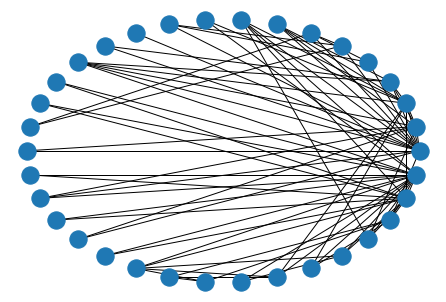

In [5]:
nx.draw_circular(karate) #Dibujar el grafo

### Analisis

Numero de Nodos y Aristas

In [6]:
print("\nNum_Nodes: "+str(karate.number_of_nodes()),"\nNum_Edges: "+str(karate.number_of_edges()))


Num_Nodes: 34 
Num_Edges: 78


#### Eccentricity

La eccentricity de un node v es la máxima distancia de v a todos los demas nodos en G.

In [7]:
nx.eccentricity(karate)

{0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 3,
 9: 4,
 10: 4,
 11: 4,
 12: 4,
 13: 3,
 14: 5,
 15: 5,
 16: 5,
 17: 4,
 18: 5,
 19: 3,
 20: 5,
 21: 4,
 22: 5,
 23: 5,
 24: 4,
 25: 4,
 26: 5,
 27: 4,
 28: 4,
 29: 5,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

#### Diámetro

El Diámetro es la *eccentricity* máxima

In [8]:
nx.diameter(karate)

5

#### Radio

El Radio is la *eccentricity* mínima.



In [9]:
nx.radius(karate)

3

#### Grado

El grado de nodo es el número de aristas adyacentes al nodo.

In [10]:
karate.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

### Caminos más cortos (Geodésica)

### Centralidad: ¿Hay nodos más importantes que otros?

En teoría de grafos, la centralidad de un nodo es una medidad que determina su importancia relativa dentro del grafo al que pertenece.

Las aplicaciones incluyen la identificación de las personas más influyentes en una red social, los nodos de infraestructura clave en Internet y los superdispersores de enfermedades.

#### Degree Centrality

El grado de centralidad de un nodo v es la proporción de nodos a los que está conectado.

La centralidad de grado se define como el número de aristas que inciden en un nodo (es decir, el número de aristas que tiene un nodo). El grado puede interpretarse en términos del riesgo inmediato de un nodo de captar lo que fluye por la red (como un virus o alguna información). En el caso de una red dirigida (en la que los aristas tienen dirección), se suelen definir dos medidas separadas de la centralidad del grado, el ingrado y el exgrado. En consecuencia, el ingrado es un recuento del número de aristas dirigidos al nodo y exgrado es el número de aristas que salen del nodo a otros. 

In [11]:
nx.degree_centrality(karate)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

#### Closeness Centrality

En un gráfico conectado, la centralidad *closeness* normalizada de un nodo es la longitud media del camino más corto entre el nodo y todos los demás nodos del gráfico. Así, cuanto más central es un nodo, más cerca está de todos los demás nodos.

In [12]:
nx.closeness_centrality(karate)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

#### Betweenness Centrality

Betweenness es una medida de centralidad de un nodo dentro de un grafo. La centralidad Betweenness cuantifica el número de veces que un nodo actúa como puente a lo largo del camino más corto entre otros dos nodos. Fue introducida como una medida para cuantificar el dominio de un humano sobre la comunicación entre otros humanos en una red social por Linton Freeman. En su concepción, los nodos que tienen una alta probabilidad de existir en el camino más corto escogido al azar entre dos nodos escogidos al azar tienen una alta betweenness.

In [13]:
nx.betweenness_centrality(karate)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

In [14]:
nx.pagerank(karate,alpha =0.9)

{0: 0.09923208031303203,
 1: 0.0543403155825792,
 2: 0.05919704684187155,
 3: 0.036612460562853694,
 4: 0.02129205163493875,
 5: 0.028358863602879276,
 6: 0.028358863602879276,
 7: 0.024777139411941047,
 8: 0.030411546757834793,
 9: 0.013746095283556584,
 10: 0.02129205163493875,
 11: 0.008523220243546811,
 12: 0.014015169158033743,
 13: 0.030254309009995452,
 14: 0.013916466828162465,
 15: 0.013916466828162465,
 16: 0.015703158296594022,
 17: 0.01395744128254017,
 18: 0.013916466828162465,
 19: 0.019434610880594574,
 20: 0.013916466828162465,
 21: 0.01395744128254017,
 22: 0.013916466828162465,
 23: 0.03165330491466868,
 24: 0.02045532726885293,
 25: 0.020410702877569672,
 26: 0.014276670024478019,
 27: 0.025579985022944167,
 28: 0.01938173195115044,
 29: 0.02603805549234405,
 30: 0.024824588072166538,
 31: 0.037572665335286734,
 32: 0.07330616298815512,
 33: 0.10345460652842152}

## Construyendo y analizando un grafo: Respuestas a comentarios en Google Classroom

In [15]:
G = nx.MultiDiGraph() # Grafo dirigido multiple

In [16]:
G.add_nodes_from(["Marisol","Luis","Cristian","Angelica","Samuel","Stephany","Rodrigo"])

In [17]:
G.add_edges_from([("Samuel","Marisol"),("Marisol","Samuel"),("Stephany","Luis"),("Angelica","Luis"),("Stephany","Luis"),("Rodrigo","Stephany"),("Rodrigo","Angelica"),("Stephany","Marisol"),("Luis","Stephany"),("Cristian","Marisol"),("Cristian","Stephany"),("Samuel","Marisol"),("Samuel","Marisol"),("Marisol","Samuel"),("Samuel","Marisol"),("Samuel","Marisol"),("Stephany","Marisol"),("Samuel","Stephany"),("Cristian","Samuel"),("Cristian","Samuel"),("Samuel","Cristian"),("Angelica","Marisol"),("Samuel","Marisol"),("Samuel","Luis"),("Samuel","Luis"),("Samuel","Luis"),("Samuel","Marisol"),("Angelica","Marisol"),("Stephany","Marisol"),("Marisol","Angelica"),("Marisol","Stephany"),("Rodrigo","Cristian")])

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 3,
 4,
 1,
 0,
 0,
 1,
 0,
 0,
 5,
 0,
 1,
 2,
 6,
 1,
 2,
 0,
 0,
 0]

In [18]:
import matplotlib.pyplot as plt

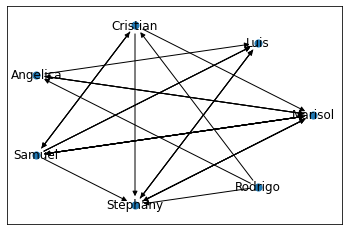

In [19]:
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=50)
nx.draw_networkx_edges(G,pos,arrowsize=10)
nx.draw_networkx_labels(G,pos)
plt.show()

In [20]:
centrality = {k: v for k, v in sorted(nx.degree_centrality(nx.DiGraph(G)).items(), key=lambda item: item[1],reverse=True)} #Solo funciona con Python>=3.7

In [21]:
centrality

{'Marisol': 1.1666666666666665,
 'Stephany': 1.1666666666666665,
 'Samuel': 1.0,
 'Cristian': 0.8333333333333333,
 'Luis': 0.6666666666666666,
 'Angelica': 0.6666666666666666,
 'Rodrigo': 0.5}

¿Qué interpretas de estos resultados?

# Ahora es tu turno.

In [22]:
#EuroRoad representa la red de carreteras de Europa

In [24]:
import pandas as pd

In [25]:
edgelist = pd.read_csv("datasets/euroroad.edges", sep=' ', header=None, names=["target", "source"])

In [26]:
edgelist

,target,source
0,1,2
1,2,3
2,2,17
3,3,4
4,4,5
...,...,...
1412,1167,1168
1413,1168,1169
1414,1169,1170
1415,1171,1172


In [27]:
G = nx.from_pandas_edgelist(edgelist)

In [46]:
pos = nx.fruchterman_reingold_layout(G) #Toma algo de tiempo

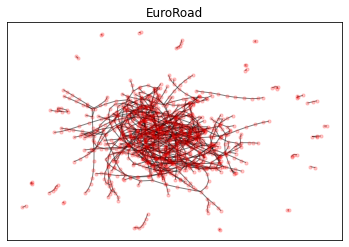

In [48]:
nx.draw_networkx_nodes(G, pos,node_size=10,node_color="red",alpha=0.2)
nx.draw_networkx_edges(G, pos,alpha=0.5)
plt.title("EuroRoad")
plt.show()

## Reto

La famosa compañia de tiendas de conveniencia *XOXO* desea abrir nuevas sucursales en las carreteras de Europa y te han contratado como científico de datos para encontrar los mejores lugares en donde abrir las nuevas tiendas. ¿Dónde las pondrías y por qué? Utiliza alguno de los métodos anteriormente vistos en el NoteBook para justificar tu respuesta.

In [204]:
# Aquí va tu código